In [30]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


plt.rcParams['figure.figsize'] = (12,6)

font = {'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

First we set up the parameters of the model. Below we set the size of the Hilbert space to include 30 atomic levels. Then we define the atom annihilation operator b. Next we define:

$\chi=220$MHz

$\kappa=311$MHz

$\epsilon_1=89$MHz

$\epsilon_2=1.244$GHz

$\epsilon_{\textsf{eff}}=-\epsilon_1 - i \epsilon_2$

$\delta=-1.825$GHz

In [2]:
n_levels = 30
b = destroy(n_levels)
chi = 0.22
kappa = 0.311
epsilon_1 = 0.089
epsilon_2 = 1.244
epsilon_eff = - epsilon_1 - 1j*epsilon_2
delta = -1.825

Then we define the Hamiltonian:

$H = H_{\textsf{atom}} + H_{\textsf{pump}}$

where

$H_{\textsf{atom}} = \delta b^\dagger b + \chi b^\dagger b^\dagger b \, b$

$ H_{\textsf{pump}} = \epsilon_{\textsf{eff}} b^\dagger + \epsilon_{\textsf{eff}}^* b$

In [3]:
hamiltonian_atom = delta*b.dag()*b + chi*b.dag()*b.dag()*b*b
hamiltonian_pump = epsilon_eff*b.dag() + np.conjugate(epsilon_eff)*b
hamiltonian = hamiltonian_atom + hamiltonian_pump

Now we define a list of Lindblad operators. In thise case we have just one:

$L = \sqrt{2 \kappa} b$

In [4]:
collapse_operators = [np.sqrt(2*kappa)*b]

Then we use the steadystate function in qutip to find the steady state density matrix of the Linblad master equation:

$ \frac{d \rho}{dt} = - i [H,\rho] + D(L) \rho$

where

$D(L)\rho = L\rho L^\dagger - \frac{1}{2}(L^\dagger L \rho + \rho L^\dagger L)$

In [5]:
rho_steady_state = steadystate(hamiltonian,collapse_operators)

From the steady state I calculate the expectation value of the atomic amplitude:

$<b> = -0.922018513927+0.857716737098j$

$|<b>|^2 = 1.58579614112$

In [6]:
b_expectation = expect(b, rho_steady_state)
print('<b> = '+str(b_expectation))
print('|<b>|^2 = '+str(np.abs(b_expectation)**2))

<b> = (-0.922018513927+0.857716737098j)
|<b>|^2 = 1.58579614112


From this steady state I produce a plot of the Q function. 

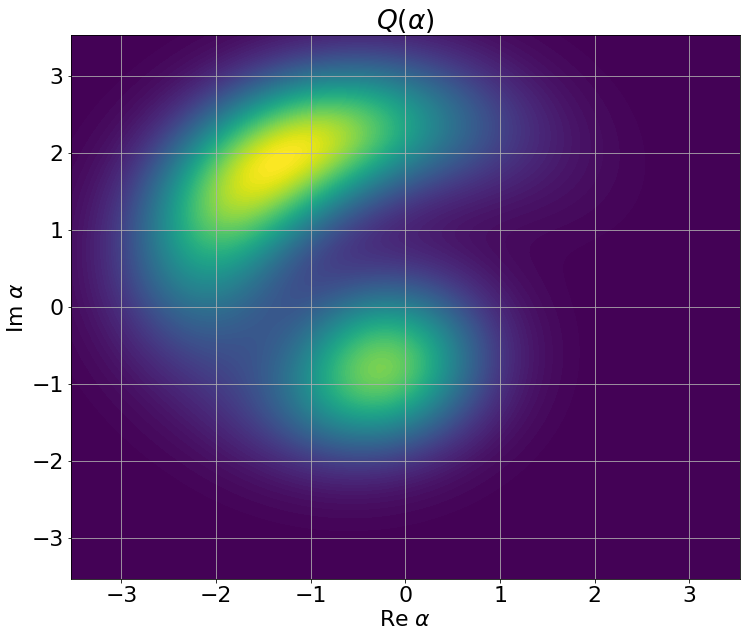

In [33]:
n_points = 101
x_array = np.linspace(-5,5,n_points)
y_array = np.linspace(-5,5,n_points)

q_function = qfunc(rho_steady_state, x_array, y_array)

fig, axes = plt.subplots(figsize=(12,10))
cont0 = axes.contourf(x_array/np.sqrt(2), y_array/np.sqrt(2), q_function, 100)
axes.set_xlabel(r'Re $\alpha$')
axes.set_ylabel(r'Im $\alpha$')
axes.set_title(r'$Q(\alpha)$')
axes.grid()

Next I plot a bar chart of the diagonal elements of the density matrix. This shows the occupation probabilities of the different cavity levels.

Text(0,0.5,'Occupation')

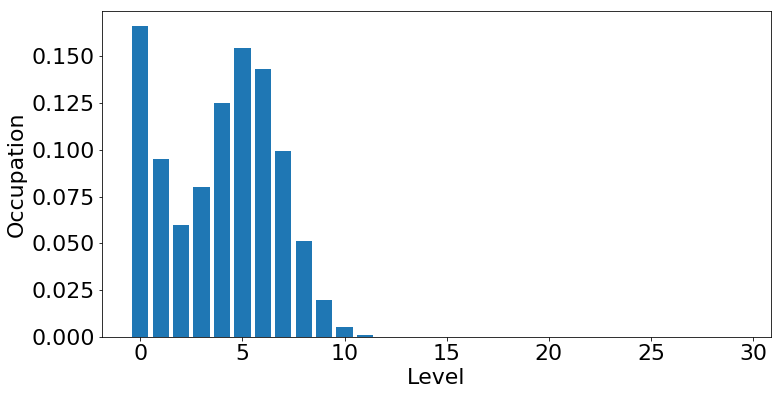

In [34]:
occupations = rho_steady_state.diag()

fig, axes = plt.subplots(1,1)

axes.bar(range(n_levels),occupations)
axes.set_xlabel('Level')
axes.set_ylabel('Occupation')

Now I crosscheck the method of plotting the Q function. I generate a coherent state with alpha=4 and plot the Q function. We expect to see a peak at alpha=4. This is what we observe.

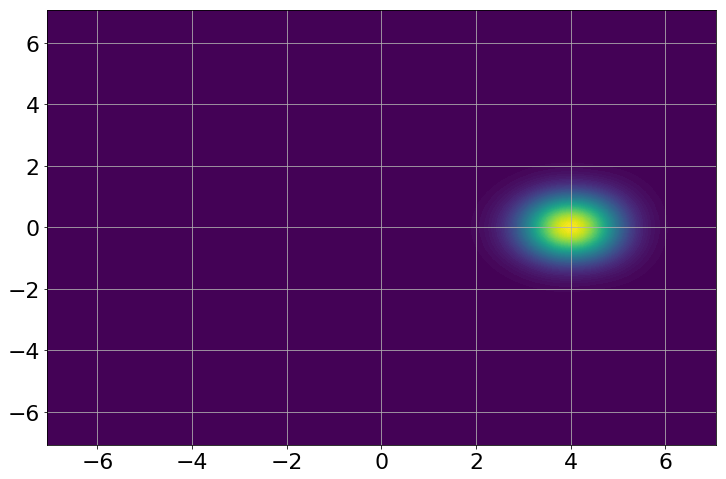

In [56]:
alpha = 4
state = coherent_dm(n_levels, alpha, offset=0, method='operator')

n_points = 101
x_array = np.linspace(-10,10,n_points)
y_array = np.linspace(-10,10,n_points)

q_function = qfunc(state, x_array, y_array)

fig, axes = plt.subplots(figsize=(12,8))
cont0 = axes.contourf(x_array/np.sqrt(2), y_array/np.sqrt(2), q_function, 100)
axes.grid()

# Identifying peaks in the Q-function. #

Now I use the following code to locate the peaks in the Q-function and display their locations. I find:

$ \alpha_{\textsf{dim}} =  -0.282842712475-0.777817459305j $

$ \alpha_{\textsf{bright}} =  -1.34350288425+1.9091883092j $

In [51]:
def maximum_finder(data):
    n_rows = data.shape[0]
    n_columns = data.shape[1]
    row_indices = []
    column_indices = []
    for i in range(1, n_rows - 1):
        for j in range(1, n_columns - 1):
            if maximum_yn(i, j, data):
                row_indices.append(i)
                column_indices.append(j)
    row_indices = np.array(row_indices)
    column_indices = np.array(column_indices)
    return row_indices, column_indices


def window_maximum_finder(i_limits, j_limits, array):
    array_reduced = array[i_limits[0]:i_limits[1], j_limits[0]:j_limits[1]]
    row_indices, column_indices = maximum_finder(array_reduced)
    if row_indices.shape[0] != 0 and column_indices.shape[0] != 0:
        array_values = array_reduced[row_indices, column_indices]
        max_index = np.argmax(array_values)
        return np.array([row_indices[max_index] + i_limits[0], column_indices[max_index] + j_limits[0]])
    else:
        return np.array([])


max_peak = window_maximum_finder([0, n_points], [0, n_points], q_function)

if max_peak[0] > n_points // 2:
    peak_bright = max_peak
    peak_dim = window_maximum_finder([0, n_points // 2],[0, n_points], q_function)
else:
    peak_dim = max_peak
    peak_bright = window_maximum_finder([n_points // 2, n_points],[0, n_points], q_function)
    
alpha_dim = (x_array[peak_dim[1]] + 1j*y_array[peak_dim[0]])/np.sqrt(2)
alpha_bright = (x_array[peak_bright[1]] + 1j*y_array[peak_bright[0]])/np.sqrt(2)

alpha_dim = (-0.282842712475-0.777817459305j)
alpha_bright = (-1.34350288425+1.9091883092j)


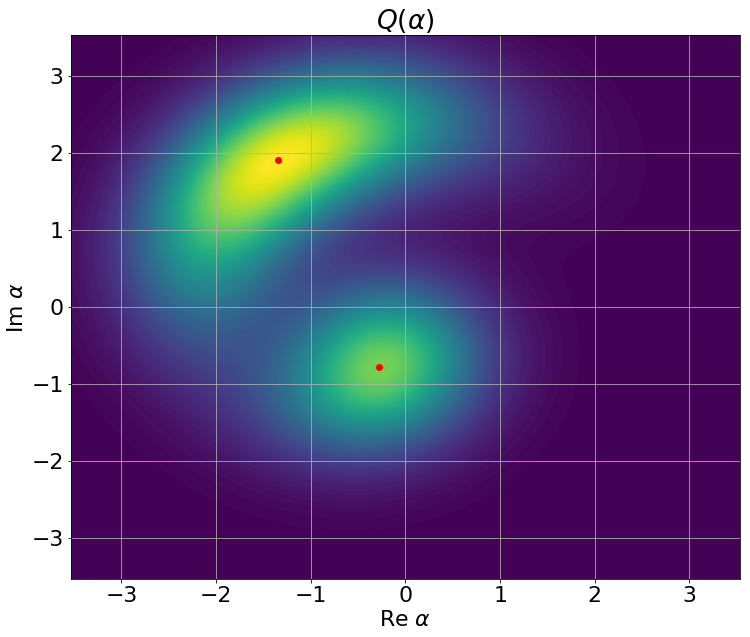

In [54]:
n_points = 101
x_array = np.linspace(-5,5,n_points)
y_array = np.linspace(-5,5,n_points)

q_function = qfunc(rho_steady_state, x_array, y_array)

fig, axes = plt.subplots(figsize=(12,10))
cont0 = axes.contourf(x_array/np.sqrt(2), y_array/np.sqrt(2), q_function, 100)
axes.set_xlabel(r'Re $\alpha$')
axes.set_ylabel(r'Im $\alpha$')
axes.set_title(r'$Q(\alpha)$')
axes.scatter(alpha_dim.real,alpha_dim.imag,color='r')
axes.scatter(alpha_bright.real,alpha_bright.imag,color='r')
axes.grid()

print('alpha_dim = '+str(alpha_dim))
print('alpha_bright = '+str(alpha_bright))